Median difference: 0.017383


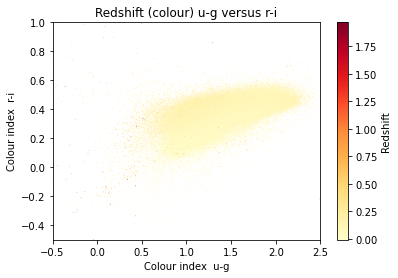

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor

def get_features_targets(data):
  features = np.zeros((data.shape[0], 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  targets = data['redshift']
  return features, targets

def median_diff(predicted, actual):
  return np.median(np.abs(predicted - actual))

def validate_model(model, features, targets):
  
  split = 2*features.shape[0]//3
  train_features, test_features = features[:split], features[split:]
  train_targets, test_targets = targets[:split], targets[split:]

  
  model.fit(train_features, train_targets)

  
  predictions = model.predict(test_features)  
  
  
  return median_diff(test_targets, predictions)


if __name__ == "__main__":
  data = pd.read_csv('../input/optical-csv/optical_data.csv',delimiter=",")
  features, targets = get_features_targets(data)

  
  dtr = DecisionTreeRegressor()

  
  diff = validate_model(dtr, features, targets)
  print('Median difference: {:f}'.format(diff))




if __name__ == "__main__":
    data = pd.read_csv('../input/optical-csv/optical_data.csv',delimiter=",")
    cmap = plt.get_cmap('YlOrRd')
    u_g = data['u'] - data['g']
    r_i = data['r'] - data['i']
    redshift = data['redshift']

    
    plot = plt.scatter(u_g, r_i, s=0.5, lw=0, c=redshift, cmap=cmap)

    cb = plt.colorbar(plot)
    cb.set_label('Redshift')

    
    plt.xlabel('Colour index  u-g')
    plt.ylabel('Colour index  r-i')
    plt.title('Redshift (colour) u-g versus r-i')

    
    plt.xlim(-0.5, 2.5)
    plt.ylim(-0.5, 1)

    plt.show()